# Seattle Library - Datenanalyse


Datasets:

* [Checkouts by Title](https://dev.socrata.com/foundry/data.seattle.gov/tmmm-ytt6)
* [Library Collection Inventory](https://data.seattle.gov/Community/Library-Collection-Inventory/6vkj-f5xf)

API-dokumenation:
* Paging through Data https://dev.socrata.com/docs/queries/
* Queries using SODA https://dev.socrata.com/docs/paging.html

In [2]:
import urllib.request
import pandas as pd

## Checkout-Daten über die API beziehen und als CSV-Datei speichern

In [3]:
url = "https://data.seattle.gov/resource/tmmm-ytt6.csv?$where=checkoutyear=2018&$limit=10000"
checkout_file = "checkout.csv"
urllib.request.urlretrieve(url, checkout_file)

('checkout.csv', <http.client.HTTPMessage at 0x7fe6bf7d46a0>)

## In einen DataFrame laden und analysieren

In [4]:
checkouts_df = pd.read_csv(checkout_file)

In [5]:
checkouts_df

,usageclass,checkouttype,materialtype,checkoutyear,checkoutmonth,checkouts,title,creator,subjects,publisher,publicationyear
0,Digital,OverDrive,EBOOK,2018,1,22,Enemy of the State,Vince Flynn,"Fiction, Literature, Thriller","Simon & Schuster, Inc.",2017
1,Digital,Hoopla,TELEVISION,2018,1,1,Newspaper Mom / Cucumber in Rio / Donut Raffle,NaN,Children's,DHX Media,NaN
2,Physical,Horizon,SOUNDDISC,2018,1,1,Mono / the Mavericks.,Mavericks (Musical group),Country music 2011 2020,"Valory,",[2015]
3,Digital,OverDrive,EBOOK,2018,1,2,Anna Karenina,Leo Tolstoy,"Classic Literature, Fiction, Literature","Penguin Group (USA), Inc.",2009
4,Digital,OverDrive,EBOOK,2018,1,1,"Dragon: Vlad Series, Book 8",Steven Brust,"Fantasy, Fiction",Macmillan Publishers,2015
...,...,...,...,...,...,...,...,...,...,...,...
9995,Digital,OverDrive,AUDIOBOOK,2018,1,1,Cooking for Picasso: A Novel (unabridged) (Una...,Camille Aubray,"Fiction, Historical Fiction, Literature",Books on Tape,2016
9996,Digital,OverDrive,EBOOK,2018,1,1,The Book of Summer: A Novel,Michelle Gable,"Fiction, Historical Fiction, Literature",Macmillan Publishers,2017
9997,Physical,Horizon,BOOK,2018,1,1,Revival / Stephen King.,"King, Stephen, 1947-","Drug addicts Fiction, Clergy Fiction, Rock mus...","Thorndike Press,",2014.
9998,Physical,Horizon,BOOK,2018,1,4,Loula is leaving for Africa / written and illu...,"Villeneuve, Anne, 1966-","Imagination Juvenile fiction, Chauffeurs Juven...","Kids Can Press,",[2013]


In [6]:
checkouts_df.shape

(10000, 11)

In [8]:
# Result: Seem like we only have enties from December - maybe need to further increase the data set and then subsample
checkouts_df["checkoutmonth"].unique()

array([ 1,  2,  3,  4,  5,  8,  9, 10, 11, 12])

In [9]:
checkouts_df["checkouts"].max()

540

In [10]:
checkouts_df["checkouts"].min()

1

In [11]:
checkouts_df["checkouts"].median()

1.0

In [12]:
checkouts_df["checkouts"].mean()

3.339

In [13]:
checkouts_df["usageclass"].unique()

array(['Digital', 'Physical'], dtype=object)

In [14]:
checkouts_df["materialtype"].unique()

array(['EBOOK', 'TELEVISION', 'SOUNDDISC', 'BOOK', 'AUDIOBOOK', 'COMIC',
       'MOVIE', 'SONG', 'MUSIC', 'MAGAZINE', 'VIDEODISC', 'SOUNDREC',
       'SOUNDDISC, VIDEODISC', 'CR', 'LARGEPRINT', 'ER, SOUNDDISC',
       'ATLAS', 'ER', 'MAP', 'VIDEOCASS, VIDEODISC', 'REGPRINT', 'VIDEO',
       'SOUNDCASS', 'ER, VIDEODISC'], dtype=object)

In [15]:
checkouts_df[checkouts_df["materialtype"] == "AUDIOBOOK"]

,usageclass,checkouttype,materialtype,checkoutyear,checkoutmonth,checkouts,title,creator,subjects,publisher,publicationyear
9,Digital,OverDrive,AUDIOBOOK,2018,2,1,Cleopatra (Unabridged),H. Rider Haggard,"Fiction, Literature","Blackstone Audio, Inc.",2008
12,Digital,OverDrive,AUDIOBOOK,2018,2,20,Matilda (Unabridged),Roald Dahl,"Fantasy, Juvenile Fiction",Books on Tape,2014
14,Digital,OverDrive,AUDIOBOOK,2018,2,4,The Power of Sleep (Unabridged),Kelly Howell,"Nonfiction, Self-Improvement",Books on Tape,2008
16,Digital,OverDrive,AUDIOBOOK,2018,2,3,Phantom Instinct (Unabridged),Meg Gardiner,"Fiction, Mystery","Blackstone Audio, Inc.",2014
39,Digital,OverDrive,AUDIOBOOK,2018,4,1,The Vaults (Unabridged),Toby Ball,"Fiction, Mystery",Iambik Audio,2014
...,...,...,...,...,...,...,...,...,...,...,...
9957,Digital,OverDrive,AUDIOBOOK,2018,1,12,"Bluebird, Bluebird: Highway 59 Series, Book 1 ...",Attica Locke,"Fiction, Mystery",Hachette Audio,2017
9963,Digital,OverDrive,AUDIOBOOK,2018,1,4,"Dark Voyage: Night Soldiers Series, Book 8 (un...",Alan Furst,"Fiction, Historical Fiction, Thriller",Simon & Schuster - All Library,2017
9974,Digital,OverDrive,AUDIOBOOK,2018,1,3,Loving My Actual Life: An Experiment in Relish...,Alexandra Kuykendall,"Nonfiction, Religion & Spirituality","Tantor Media, Inc",2017
9995,Digital,OverDrive,AUDIOBOOK,2018,1,1,Cooking for Picasso: A Novel (unabridged) (Una...,Camille Aubray,"Fiction, Historical Fiction, Literature",Books on Tape,2016


In [16]:
checkouts_audiobooks_df = checkouts_df[checkouts_df["materialtype"] == "AUDIOBOOK"]

In [17]:
checkouts_audiobooks_df.shape

(861, 11)

In [18]:
checkouts_audiobooks_df.to_csv("checkout_audio_books_only.csv")

In [19]:
checkouts_audiobooks_df.to_excel("checkout_audio_books_only.xlsx")

In [20]:
checkouts_df["materialtype"].value_counts()

BOOK                    4284
EBOOK                   2088
AUDIOBOOK                861
SOUNDDISC                839
VIDEODISC                806
SONG                     693
MUSIC                    134
MOVIE                     95
TELEVISION                81
COMIC                     60
SOUNDDISC, VIDEODISC      10
MAGAZINE                  10
SOUNDREC                   8
REGPRINT                   7
VIDEO                      5
CR                         4
ER, SOUNDDISC              3
ER                         3
MAP                        3
ATLAS                      2
LARGEPRINT                 1
VIDEOCASS, VIDEODISC       1
SOUNDCASS                  1
ER, VIDEODISC              1
Name: materialtype, dtype: int64

In [21]:
%matplotlib inline

<AxesSubplot:>

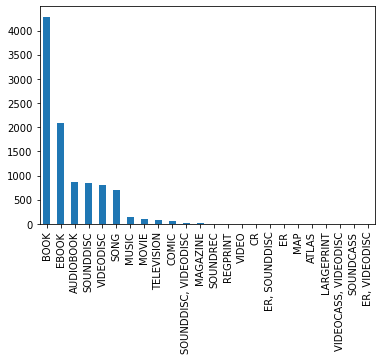

In [22]:
checkouts_df["materialtype"].value_counts().plot(kind="bar")

<AxesSubplot:>

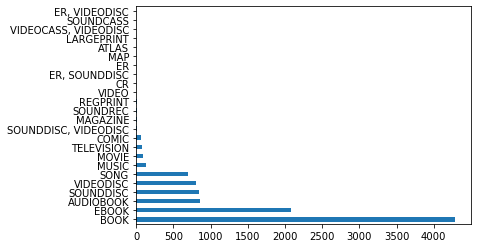

In [23]:
checkouts_df["materialtype"].value_counts().plot(kind="barh")

<AxesSubplot:>

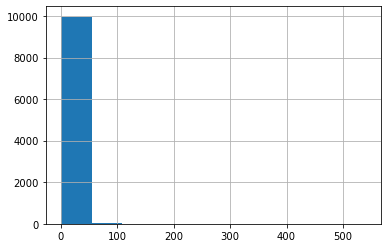

In [24]:
checkouts_df["checkouts"].hist()

<AxesSubplot:>

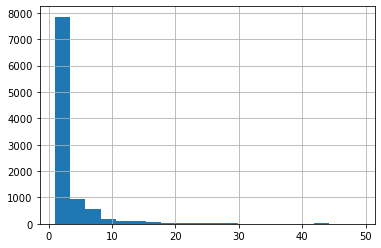

In [25]:
checkouts_df[checkouts_df["checkouts"] < 50 ]["checkouts"].hist(bins=20)